In [3]:
import pandas as pd

# Load the rodent dataset
df = pd.read_csv('../data/dados_roedores.csv')  # path to your CSV
df.head()

,Gênero,Espécie,Subespécie,Clima,Data,Temperatura,Umidade,Aparições,Local
0,Macho,Roedor,Esquilo-da-caatinga,Úmido,2022-12-13,21.439400,73.544502,7,Petrolina
1,Fêmea,Roedor,Capivara,Chuva,2022-12-24,19.181234,71.648514,4,Recife
2,Fêmea,Roedor,Capivara,Chuva,2023-04-01,19.358555,58.975769,2,Camaragibe
3,Fêmea,Roedor,Cutia,Chuva,2022-12-17,28.367251,45.240464,2,Petrolina
4,Macho,Roedor,Esquilo-da-caatinga,Chuva,2022-12-19,30.093015,66.910000,2,Recife


In [4]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gênero       144 non-null    object 
 1   Espécie      144 non-null    object 
 2   Subespécie   144 non-null    object 
 3   Clima        144 non-null    object 
 4   Data         144 non-null    object 
 5   Temperatura  144 non-null    float64
 6   Umidade      144 non-null    float64
 7   Aparições    144 non-null    int64  
 8   Local        144 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 10.3+ KB


,Temperatura,Umidade,Aparições
count,144.000000,144.000000,144.000000
mean,21.760071,61.293327,4.916667
std,7.326193,18.843204,3.308180
min,10.376601,30.021974,0.000000
25%,15.190757,44.250867,2.000000
50%,21.025515,61.286382,5.000000
75%,28.387072,78.240393,8.000000
max,34.984568,89.996838,10.000000


In [11]:
# Features: Temperature, Humidity, Climate, Location
X = df[['Temperatura', 'Umidade']]

# Target: rodent appearances
y = df['Aparições']

X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf = RandomForestRegressor(n_estimators=1250, random_state=0)

# Train the model
rf.fit(X_train, y_train)

print("RandomForest model trained successfully!")

# Model performance
score = rf.score(X_test, y_test)
print(f"R^2 score on test data: {score:.3f}")

import pandas as pd
importance = pd.Series(rf.feature_importances_, index=X.columns)
print(importance)

RandomForest model trained successfully!
R^2 score on test data: -0.185
Temperatura    0.518999
Umidade        0.481001
dtype: float64


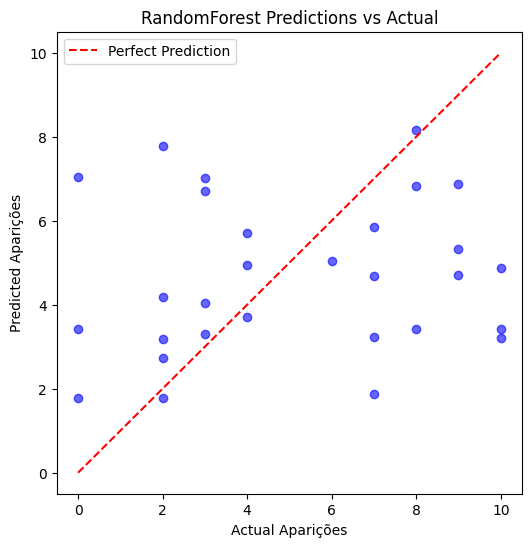

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = rf.predict(X_test)

# Scatter plot: actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Aparições")
plt.ylabel("Predicted Aparições")
plt.title("RandomForest Predictions vs Actual")

# Add diagonal line (perfect predictions)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()

plt.show()

R²: 0.022217631013882633


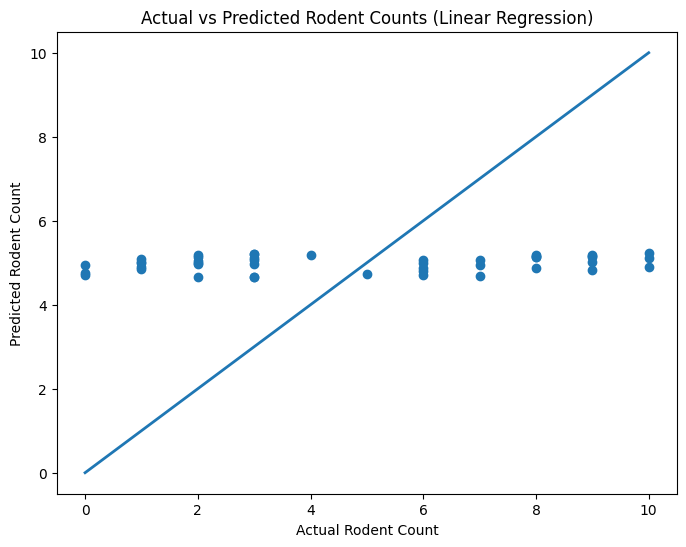

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- Train Linear Regression ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Print R² ---
print("R²:", r2_score(y_test, y_pred))

# --- Plot: Actual vs Predicted ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rodent Count")
plt.ylabel("Predicted Rodent Count")
plt.title("Actual vs Predicted Rodent Counts (Linear Regression)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linewidth=2)

plt.show()